In [1]:
import numpy as np
from numpy.linalg import inv, eigvals, solve
from numpy.random import default_rng
import pandas as pd
import statsmodels.formula.api as sm
import japanize_matplotlib
import py4macro

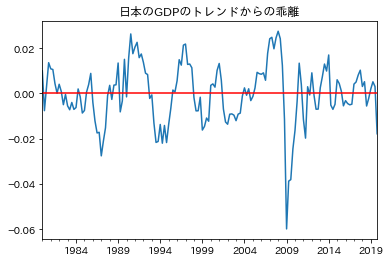

In [2]:
# データの読み込み
df = py4macro.data('jpn-q')

# トレンドからの乖離のデータの作成
df['gdp_cycle'] = np.log( df['gdp']/py4macro.trend(df['gdp']))

# プロット
ax_ = df['gdp_cycle'].plot(title='日本のGDPのトレンドからの乖離')
ax_.axhline(0, c='red')
pass

In [3]:
rng = default_rng()

In [4]:
rng.normal(5, 2, 10)

array([5.41317312, 3.06647278, 5.90744641, 2.51495645, 4.95366285,
       2.78455768, 4.00041534, 4.82104362, 6.76249129, 2.76996911])

In [5]:
rng.normal(size=5)

array([ 0.65043578, -0.64333841, -0.07328368,  0.58112642, -0.37784269])

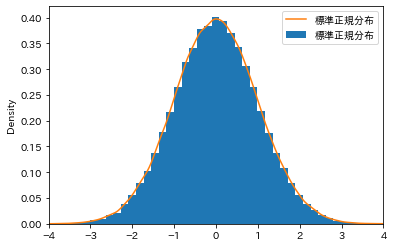

In [6]:
# ランダム変数のDatFrame
df_norm = pd.DataFrame({'標準正規分布':rng.normal(size=100_000)})

# ヒストグラム
ax_ = df_norm.plot(kind='hist', bins=50, density=True)

# カーネル密度関数
df_norm.plot(kind='density',ax=ax_)

# 横軸の表示幅の設定
ax_.set_xlim(-4,4)
pass

In [7]:
rng.uniform(5, 30, 10)

array([10.34755214, 23.98602382, 10.39929161, 14.30046735, 24.24818284,
       19.43204067, 16.94572532,  5.59578861, 14.96635984, 11.44367938])

In [8]:
rng.uniform(size=5)

array([0.31564797, 0.745259  , 0.94434567, 0.78065348, 0.41953081])

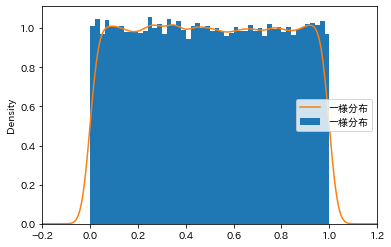

In [9]:
# ランダム変数のDatFrame
df_uni = pd.DataFrame({'一様分布':rng.uniform(size=100_000)})

# ヒストグラム
ax_ = df_uni.plot(kind='hist', bins=50, density=True)

# カーネル密度関数
df_uni.plot(kind='density',ax=ax_)

# 横軸の表示幅の設定
ax_.set_xlim(-0.2,1.2)
pass

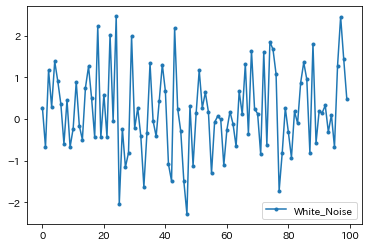

In [10]:
n = 100

vals = rng.normal(size=n)

df_wn = pd.DataFrame({'White_Noise':vals})

df_wn.plot(marker='.')
pass

In [11]:
vals.mean(), vals.var()

(0.1804020931422573, 1.014606589448669)

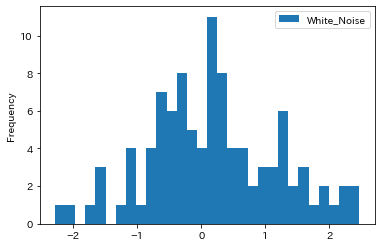

In [12]:
df_wn.plot(kind='hist', bins=30)
pass

In [13]:
current = vals[:-1]
one_period_ahead = vals[1:]

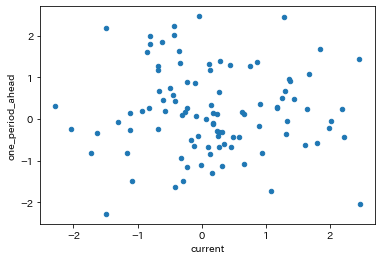

In [14]:
# DataFrameの作成
df_wn2 = pd.DataFrame({'current':current,'one_period_ahead':one_period_ahead})

# 散布図のプロット
df_wn2.plot(x='current', y='one_period_ahead', kind='scatter')
pass

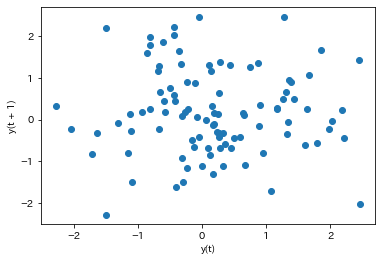

In [15]:
pd.plotting.lag_plot(df_wn)
pass

In [16]:
np.cov(current, one_period_ahead)

array([[ 1.03435111, -0.02057074],
       [-0.02057074,  1.03522344]])

In [17]:
df_wn['White_Noise'].autocorr()

-0.0198792022532256

In [18]:
def ar1_model(rho, T=100):
    """引数：
            rho: AR(1)のpersistenceを捉えるパラメータ
            T:   シミュレーションの回数（デフォルト：0）
       戻り値：
            matplotlibの図を示す
            自己相関係数の値を表示する"""
    
    y0 = 0                          # 1
    y_list = [y0]                   # 2
    y = y0                          # 3

    for t in range(1,T):            # 4
        e = rng.normal()            # 5
        y = rho*y + e               # 6
        y_list.append(y)            # 7

    df_ar1 = pd.Series(y_list)      # 8

    ac = df_ar1.autocorr()          # 9
    
    ax_ = df_ar1.plot(marker='.')   # 10
    ax_.set_title(fr'$\rho$={rho}       自己相関係数：{ac:.3f}',size=20) # 11
    ax_.axhline(0, c='red')         # 12

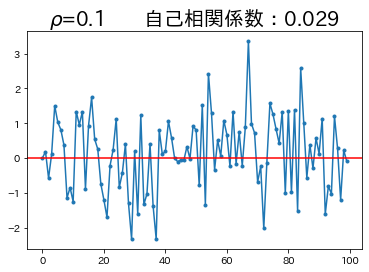

In [19]:
ar1_model(0.1)

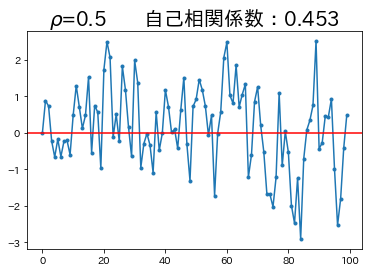

In [20]:
ar1_model(0.5)

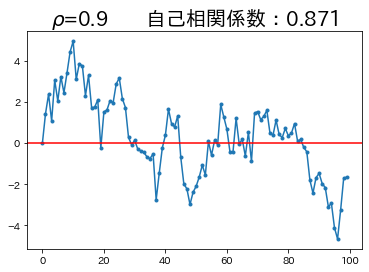

In [21]:
ar1_model(0.9)

In [22]:
df['hours_trend'] = py4macro.trend(df['hours'])
df['hours_cycle'] = np.log( df['hours']/df['hours_trend'] )

df['employed_trend'] = py4macro.trend(df['employed'])
df['employed_cycle'] = np.log( df['employed']/df['employed_trend'] )

df['total_hours_trend'] = py4macro.trend(df['total_hours'])
df['total_hours_cycle'] = np.log( df['total_hours']/df['total_hours_trend'] )

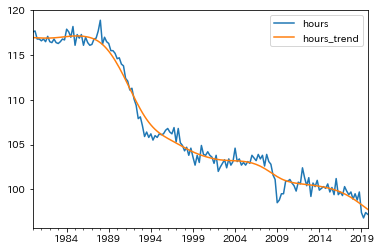

In [23]:
df[['hours','hours_trend']].plot()
pass

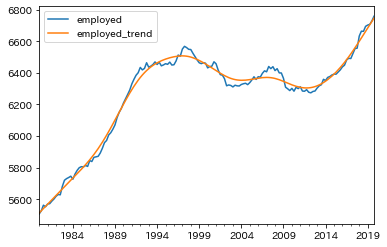

In [24]:
df[['employed','employed_trend']].plot()
pass

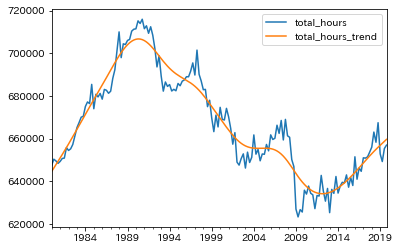

In [25]:
df[['total_hours','total_hours_trend']].plot()
pass

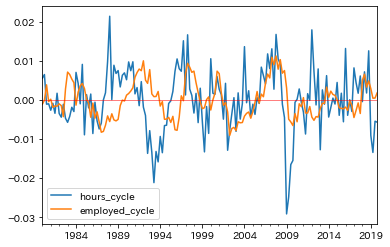

In [26]:
ax_ = df[['hours_cycle','employed_cycle']].plot()
ax_.axhline(0, c='red', lw=0.5)
pass

In [27]:
cycle_list = ['hours_cycle','employed_cycle','total_hours_cycle']
var_list = ['平均労働時間','就業者数','総労働時間']

print('     自己相関係数\n----------------------')

for c, v in zip(cycle_list,var_list):
    ac = df[c].autocorr()
    print(f'{v:<5}\t{ac:.3f}')  # 1

     自己相関係数
----------------------
平均労働時間	0.481
就業者数 	0.833
総労働時間	0.616


In [28]:
print('GDPサイクルとの相関係数')
print('-------------------------')

for c, v in zip(cycle_list,var_list):
    corr = df[['gdp_cycle',c]].corr().iloc[0,1]
    print(f'{v:<9}\t{corr:.3f}')

GDPサイクルとの相関係数
-------------------------
平均労働時間   	0.643
就業者数     	0.453
総労働時間    	0.747


In [29]:
a = 0.36

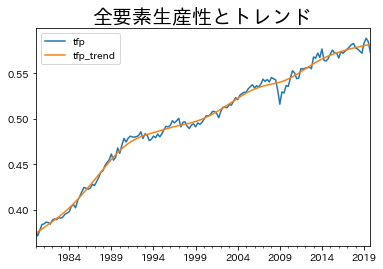

In [30]:
# 全要素生産性の計算
df['tfp'] = df['gdp']/( df['capital']**a * df['total_hours']**(1-a) )

# 全要素生産性のトレンドの計算
df['tfp_trend'] = py4macro.trend(df['tfp'])

# 全要素生産性のトレンドからの乖離の計算
df['tfp_cycle'] = np.log( df['tfp']/df['tfp_trend'] )

# 全要素生産性とトレンドのプロット
ax_ = df[['tfp','tfp_trend']].plot()
ax_.set_title('全要素生産性とトレンド', size=20)
pass

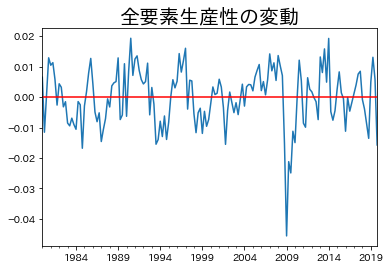

In [31]:
ax_ = df['tfp_cycle'].plot()
ax_.axhline(0, c='red')
ax_.set_title('全要素生産性の変動', size=20)
pass

In [32]:
100*df['tfp_cycle'].min(), 100*df['tfp_cycle'].max()

(-4.5583731587650735, 1.9303257666042997)

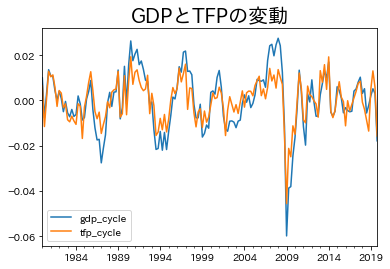

In [33]:
ax_ = df[['gdp_cycle','tfp_cycle']].plot()
ax_.set_title('GDPとTFPの変動',size=20)
pass

In [34]:
df[['gdp_cycle','tfp_cycle']].corr().iloc[0,1]

0.8837353731027165

In [35]:
df['tfp_cycle'].autocorr()

0.5467923296455576

In [36]:
df['gdp_cycle'].autocorr()

0.764451624371967

In [37]:
df['tfp_cycle_lag'] = df['tfp_cycle'].shift()

In [38]:
df[['tfp_cycle','tfp_cycle_lag']].head()

,tfp_cycle,tfp_cycle_lag
,,
1980-03-31,0.006504,NaN
1980-06-30,-0.011544,0.006504
1980-09-30,0.000867,-0.011544
1980-12-31,0.012880,0.000867
1981-03-31,0.010449,0.012880


In [39]:
res_tfp = sm.ols('tfp_cycle ~ -1 + tfp_cycle_lag', data=df).fit()
rho = res_tfp.params[0]
rho

0.5508112208782231

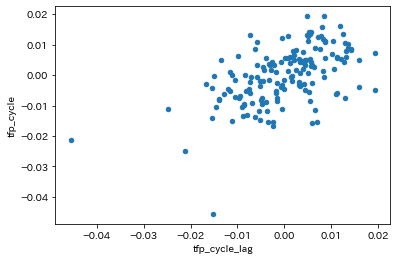

In [40]:
df.plot(x='tfp_cycle_lag',y='tfp_cycle',kind='scatter')
pass

In [41]:
sigma = np.std(res_tfp.resid,ddof=1)
sigma

0.007836966505771769

自己相関係数：0.602


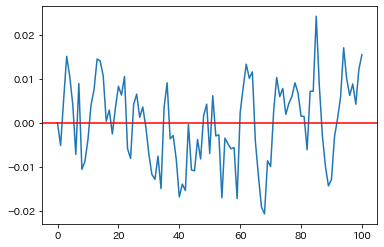

In [42]:
T = 100        # 標本の大きさ
A = 0          # 初期値
A_list = [A]   # 値を格納するリスト

for i in range(T):
    e = np.random.normal(loc=0,scale=sigma)
    A = rho*A+e
    A_list.append(A)

df_A = pd.Series(A_list)            # Seriesの作成
ax_ = df_A.plot()                   # 図示
ax_.axhline(0, c='red')             # 0の平行線

ac_tfp = df_A.autocorr()       # 自己相関係数の計算
print(f'自己相関係数：{ac_tfp:.3f}')

In [43]:
var_list = ['gdp','capital','total_hours'] # 1
year_list = ['1980','2019']                # 2

gdp_dict = {}  # 3
K_dict = {}    # 4
H_dict = {}    # 5

for yr in year_list:        # 6
    mean = df.loc[f'{yr}-03-31':f'{yr}-12-31',var_list].mean() # 7
    gdp_dict[yr] = mean[0]  # 8
    K_dict[yr] = mean[1]    # 9
    H_dict[yr] = mean[2]    # 10

In [44]:
gdp_dict

{'1980': 260466.05, '2019': 536203.9249999999}

In [45]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'gdp_cycle', 'hours_trend', 'hours_cycle',
       'employed_trend', 'employed_cycle', 'total_hours_trend',
       'total_hours_cycle', 'tfp', 'tfp_trend', 'tfp_cycle', 'tfp_cycle_lag'],
      dtype='object')

In [46]:
var_idx = [0,6,11]         # 1
df0 = df.iloc[0,var_idx]   # 2
df1 = df.iloc[-1,var_idx]  # 3

# 4
B0 = df0['gdp']/( df0['capital']**a * df0['total_hours']**(1-a))

# 5
B1 = df1['gdp']/( df1['capital']**a * df1['total_hours']**(1-a))

no_quarters = len(df)      # 6

g = (B1/B0)**(1/no_quarters)-1  # 7
g

0.0026200422015019154

In [47]:
s = (df['investment']/df['gdp']).mean()
s

0.20356557332919753

In [48]:
def stochastic_solow(T=160,  # 160=40*4 40年間の四半期の数
                     rho=rho,
                     sigma=sigma,
                     g=g,
                     s=s,
                     d=0.025,
                     a=a,
                     H=H_dict['1980'],
                     K0=K_dict['1980'],
                     B0=B0):
    """引数：
            T:     シミュレーションの回数
            rho:   AR(1)のパラメータ
            sigma: ホワイト・ノイズ分散
            g:     TFPの平均四半期成長率
            s:     貯蓄率
            d:     資本減耗率
            a:     生産関数のパラメータ（資本の所得割合）
            H:     総労働時間
       返り値
            次の変数を含むDataFrame
            GDP，消費，投資，資本ストック，全要素生産性の水準，トレンド，変動"""
    
    # ========== A,B,Kの計算 ==========
    # 計算結果を格納するリスト
    A_list = [1]    # 1
    B_list = [B0]   # 2
    K_list = [K0]   # 3

    # 初期値でありアップデート用変数
    A = 1           # 4
    B = B0          # 5
    K = K0          # 6

    # A,B,Kの時系列の計算
    for t in range(1,T):
        K = s * A*B * K**a *H**(1-a) + (1-d)*K  # 7
        
        e = np.random.normal(0,scale=sigma)     # 8
        A = A**rho * np.exp(e)                  # 9
        B = B0*(1+g)**t                         # 10
        
        A_list.append(A)                        # 11
        B_list.append(B)
        K_list.append(K)
    
    # ========== DataFrameの作成 ==========
    df_sim = pd.DataFrame({'K':K_list,          # 12
                           'A':A_list,
                           'B':B_list})

    # ========== Y,C,Iの計算 ==========          # 13
    df_sim['Y'] = df_sim['A']*df_sim['B']*df_sim['K']**a * H**(1-a)
    df_sim['C'] = (1-s)*df_sim['Y']
    df_sim['I'] = s*df_sim['Y']
    
    # ========== トレンドとサイクルの計算 ==========
    for v in ['K','A','Y','C','I']:
        # ---------- レンドの計算 ----------      # 14
        df_sim[f'{v}_trend'] = py4macro.trend(df_sim[v])
        # ---------- サイクルの計算 ----------    # 15
        df_sim[f'{v}の変動'] = np.log( df_sim[v]/df_sim[f'{v}_trend'] )
    
    return df_sim

In [49]:
df_sim = stochastic_solow()
df_sim.head()

,K,A,B,Y,C,I,K_trend,Kの変動,A_trend,Aの変動,Y_trend,Yの変動,C_trend,Cの変動,I_trend,Iの変動
0,768601.675000,1.000000,0.376813,259894.572371,206988.984741,52905.587630,766635.613538,0.002561,0.987165,0.012918,257980.760322,0.007391,205464.758939,0.007391,52516.001383,0.007391
1,802292.220755,0.992067,0.377800,262531.855623,209089.407916,53442.447707,800423.977656,0.002331,0.987874,0.004236,262400.374583,0.000501,208984.691890,0.000501,53415.682694,0.000501
2,835677.362943,0.982468,0.378790,264526.931845,210678.355303,53848.576542,834213.570562,0.001753,0.988591,-0.006213,266821.184977,-0.008636,212505.577481,-0.008636,54315.607496,-0.008636
3,868634.005411,0.976701,0.379782,267360.212267,212934.877372,54425.334896,868006.788697,0.000722,0.989327,-0.012845,271244.469812,-0.014424,216028.433802,-0.014424,55216.036010,-0.014424
4,901343.490172,0.976927,0.380777,271714.595837,216402.858354,55311.737483,901806.943371,-0.000514,0.990089,-0.013382,275670.073487,-0.014453,219553.136928,-0.014453,56116.936559,-0.014453


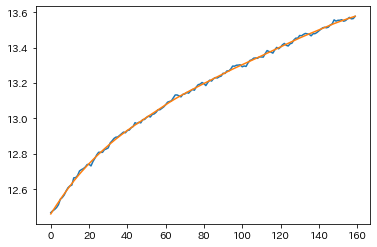

In [50]:
np.log(df_sim['Y']).plot()
np.log(df_sim['Y_trend']).plot()
pass

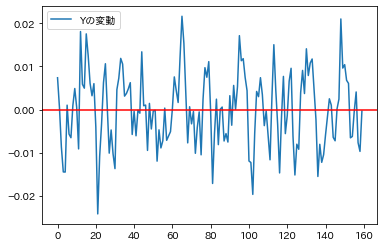

In [51]:
ax_ = df_sim['Yの変動'].plot(legend=True)
ax_.axhline(0, c='red')
pass

In [52]:
var_list = ['Y','C','I','K','A']

print('\n--- シミュレーション：変動の自己相関係数 ---\n')

for v in var_list:
    ac = df_sim[f'{v}の変動'].autocorr()
    print(f'{v}の変動： {ac:.3f}')


--- シミュレーション：変動の自己相関係数 ---

Yの変動： 0.505
Cの変動： 0.505
Iの変動： 0.505
Kの変動： 0.908
Aの変動： 0.496


In [53]:
data_var_list = ['consumption','investment','capital']

for v in data_var_list:
    df[f'{v}_cycle'] = np.log( df[v]/py4macro.trend(df[v]) )

In [54]:
data_var_list = ['gdp']+data_var_list+['tfp']

In [55]:
print('\n--- データ：変動の自己相関係数 ---\n')

for v in data_var_list:
    ac = df[f'{v}_cycle'].autocorr()
    print(f'{v:>11}の変動： {ac:>5.3f}')      # 1


--- データ：変動の自己相関係数 ---

        gdpの変動： 0.764
consumptionの変動： 0.522
 investmentの変動： 0.838
    capitalの変動： 0.892
        tfpの変動： 0.547


In [56]:
print('\n--- シミュレーション：GDPとの相関係数 ---\n')

for v in var_list[1:]:
    cov = df_sim[['Yの変動',v]].corr().iloc[0,1]
    print(f'{v}の変動： {cov:.3f}')


--- シミュレーション：GDPとの相関係数 ---

Cの変動： 0.037
Iの変動： 0.037
Kの変動： 0.005
Aの変動： 0.968


In [57]:
print('\n--- データ：GDPとの相関係数 ---\n')

for v in data_var_list[1:]:
    cor = df[['gdp_cycle',f'{v}_cycle']].corr().iloc[0,1]
    print(f'{v:>11}の変動：{cor:>5.3f}')


--- データ：GDPとの相関係数 ---

consumptionの変動：0.706
 investmentの変動：0.816
    capitalの変動：0.179
        tfpの変動：0.884
